![Problema a resolcver](./imgs/p1.png)

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

In [2]:
# --- Parámetros ajustables ---
rad = 0.35   # Radio de la llanta (en metros)
vel = 1.0   # Velocidad de traslación (en m/s)

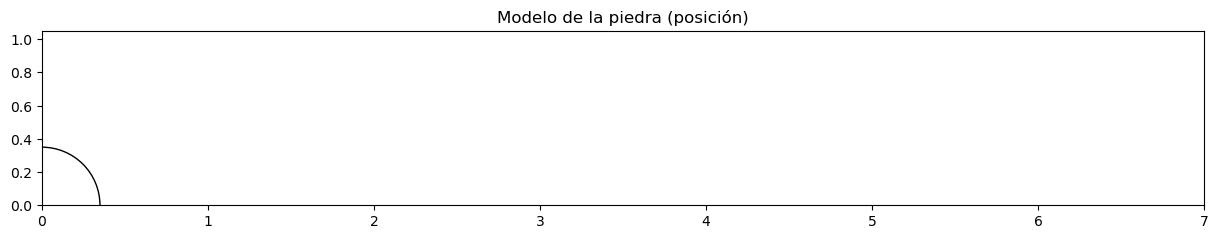

In [3]:
# --- Funciones de la cicloide ---
def x(t, v, r):
    return v*t - r*math.sin((v/r)*t)

def y(t, v, r):
    return r - r*math.cos((v/r)*t)

# --- Preparar la figura y ejes ---
fig, ax = plt.subplots(figsize=(15, 4))
plt.title("Modelo de la piedra (posición)")

# Trayectoria (línea) + marcador del punto
path_line, = ax.plot([], [], '-')
marker_line, = ax.plot([], [], 'o')

# Círculo (llanta)
wheel = plt.Circle((0, 0), rad, fill=False)
ax.add_patch(wheel)

# Límites y aspecto
ax.set_xlim(0, 20 * rad)
ax.set_ylim(0, 3 * rad)
ax.set_aspect('equal', 'box')  # Misma escala en X y Y

# Escritura de GIF
metadata = dict(title="Test", artist="Pelca")
writer = PillowWriter(fps=15, metadata=metadata)

# --- Parámetros de tiempo y pasadas ---
t_inicial = 0.0
t_final = 20.0 * rad
pasos = 500
dt = (t_final - t_inicial) / pasos

pass_count = 2
total_frames = pass_count * (pasos + 1)

x_vals, y_vals = [], []


In [4]:
with writer.saving(fig, "rueda.gif", dpi=100):
    for frame_index in range(total_frames):
        # Índice dentro de la pasada
        i = frame_index % (pasos + 1)

        # Al iniciar una nueva pasada, limpia el rastro
        if i == 0:
            x_vals.clear()
            y_vals.clear()

        # Calcula tiempo y coordenadas
        t = t_inicial + i*dt
        px = x(t, vel, rad)
        py = y(t, vel, rad)

        # Actualiza el trazo y el marcador
        x_vals.append(px)
        y_vals.append(py)
        path_line.set_data(x_vals, y_vals)
        marker_line.set_data([px], [py])

        # Mueve la llanta a (vel*t, rad)
        wheel.set_center((vel*t, rad))

        # Captura el fotograma
        writer.grab_frame()
